# 컨볼루션 신경망(CNN)

## 사용할 패키지 불러오기
### keras에서 필요한 데이터, 모델, 레이어를 import 함.
- Sequence : 레이어들을 선형으로 쌓는 모델
- Dense : 입출력을 연결해줌
- Enbedding : Data를 밀집 벡터로 만드는 층
- Flatten : 결과를 1차원으로 보여줌
- Dropout : 규제 방법중 하나로 과대적합을 감소시키는데 사용 
- Conv1D : 지역적 특징을 추출 하는 층
- GlobalMaxPooling1D : 가장큰 벡터를 반환

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

max_features = 20000 
text_max_words = 200 

## 데이터셋 설정하기
- 25000개의 IMDB 훈련 SET을 다시 20000개의 훈련 SET과 5000개의 검증 SET으로 데이터 SET으로 생성한다

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

## 모델 구성하기
- 선형 모델로 구성
- max_fetures 즉 20000개의 데이터를 임베딩 한후의 벡터의 크기(특징의 크기)는 128이다
- 20%의 Dropout 비율
- 필터의 크기가 3이고 , padding은 사용하지 않음, 컨볼루션의 보폭을 1로 지정
- 가장큰 벡터를 반환, 128개의 뉴런을 출력 한후 20%의 비율로 Dropout(?)
- 출력 뉴런은 1개이고 활성화함수 'sigmod'를 사용

In [4]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


W0805 10:15:56.911487  7452 deprecation_wrapper.py:119] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 10:15:56.971325  7452 deprecation_wrapper.py:119] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 10:15:56.977309  7452 deprecation_wrapper.py:119] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 10:15:57.014212  7452 deprecation_wrapper.py:119] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placehold

## 모델 학습과정 설정하기

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

W0805 10:15:57.328562  7452 deprecation_wrapper.py:119] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 10:15:57.399372  7452 deprecation_wrapper.py:119] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0805 10:15:57.407994  7452 deprecation.py:323] From C:\Users\lymmo\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 256)          98560     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

## 모델 학습시키기

In [6]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 97s 5ms/step - loss: 0.4659 - acc: 0.7579 - val_loss: 0.3073 - val_acc: 0.8704
Epoch 2/25
20000/20000 [==============================] - 90s 5ms/step - loss: 0.2148 - acc: 0.9168 - val_loss: 0.2634 - val_acc: 0.8946
Epoch 3/25
20000/20000 [==============================] - 95s 5ms/step - loss: 0.0846 - acc: 0.9738 - val_loss: 0.2995 - val_acc: 0.8924
Epoch 4/25
20000/20000 [==============================] - 93s 5ms/step - loss: 0.0219 - acc: 0.9951 - val_loss: 0.3406 - val_acc: 0.8998
Epoch 5/25
20000/20000 [==============================] - 93s 5ms/step - loss: 0.0055 - acc: 0.9996 - val_loss: 0.3962 - val_acc: 0.8966
Epoch 6/25
20000/20000 [==============================] - 89s 4ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4218 - val_acc: 0.8998
Epoch 7/25
20000/20000 [==============================] - 87s 4ms/step - loss: 7.1121e-04 - acc: 1.0000 - val_loss: 0.4499 - val_

## 학습과정 설정하기
- 훈련 정확도는 점점 감소하다가 11번째 12번째 에포크에서 잠시 증가했다 다시 감소하는 것을 확인 할 수 있다.
- 14,22번째 에포크에서 과적합이 일어나고, 21번째 에포크를 진행 했을때 학습 모델의 가장큰 정확도를 보여준다.
- 4번째 에포크부터 훈련 정확도의 수치는 크게 변화가 없다.

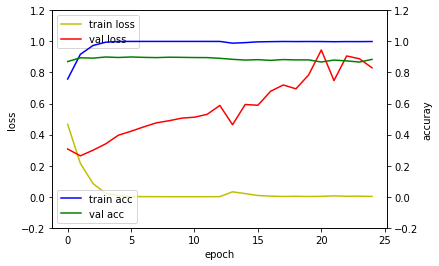

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## 모델 평가하기
- 약 91%의 정확도를 확인 할 수 있다.

In [8]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 25s 986us/step
## evaluation loss and_metrics ##
[0.9118292987823486, 0.86736]
